In [7]:
from imblearn.over_sampling import SMOTE

In [ ]:
!pip install -U yellowbrick
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassPredictionError
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

plt.style.use('classic')
matplotlib.rcParams['figure.figsize'] = (10, 10)
!pip install texthero
from texthero import preprocessing

In [9]:
import pandas as pd
import texthero as hero
from texthero import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import HashingVectorizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from yellowbrick.contrib.classifier import DecisionViz


In [19]:
cols = ['EventDescription','IncidentCause','IncidentConsequence','Category']
df = pd.read_csv('/content/cleaned_incidents1.csv', usecols= cols)
df = df.dropna(subset=['Category'])
df['Description'] = df['EventDescription'] + ' '+ df['IncidentCause']+ ' ' + df['IncidentConsequence']
df['clean_description'] = hero.clean(df['Description'])
#create a custom cleaning pipeline
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   #, preprocessing.remove_stopwords
                   , preprocessing.remove_whitespace
                   , preprocessing.stem]
#pass the custom_pipeline to the pipeline argument
df['clean_description'] = hero.clean(df['Description'], pipeline = custom_pipeline)
print(df['Category'].unique())
#Y = LabelEncoder().fit_transform(df['Category'])
#print(np.unique(Y))
Y = df['Category']
#print(Y)


tf_5000 = TfidfVectorizer(analyzer='word', max_features=250)
tf_5000.fit(df['clean_description'])
#pickle.dump(tf_5000, open("tf_5000.pickle", "wb"))

x_train, x_test, y_train, y_test = train_test_split(df['clean_description'], Y, random_state=1, test_size=0.25, stratify=Y, shuffle=True)
print(x_test)
#transform the text columns into sparse matrix of tfidf
#train_tfidf = tf_5000.transform(x_train)

#apply upsampling with smote on train data
#oversample = SMOTE(random_state=0,n_jobs=-1,k_neighbors=5)
#x_train, y_train = oversample.fit_resample(train_tfidf, y_train)


#selecting on 'Fuse' from Category
df_test = pd.DataFrame(x_test)
df_test['Category'] = y_test

#filtering the rows
#x_test = df_test.clean_description
#y_test = df_test.Category


x_test = df_test.clean_description[df_test['Category'].isin(['Animal'])] #UG Cable
y_test = df_test.Category[df_test['Category'].isin(['Animal'])]

print(y_test.shape)

#test_tfidf = tf_5000.transform(x_test)

['OH Cable' 'Dug up' 'Connection' 'Other' 'Vehicle' 'Fuse' 'Trees' 'Pole'
 'Crossarm' 'Conductor' 'Animal' 'AF Other' 'Lightning' 'UG Cable'
 'Installation']
4330    vicfir advis of grass fire caus by a larg plan...
6022    a compani employe found a damag pole at the in...
5236    rec report an underground servic cabl dug up a...
4593    e0019302 mec worker contractor has receiv flas...
6038    ue receiv a call that a tree was in power line...
                              ...                        
5141    caller report wire down at properti on arriv c...
4388    vic fire report small grass fire caus by spark...
3176    custom rang to advis he heard a loud bang and ...
1160    vic fire report a fire on a pole at the incid ...
598     a pedestrian report that there was a wire spar...
Name: clean_description, Length: 1623, dtype: object
(70,)


In [21]:
print(x_test)

(70,)


In [22]:
#splitting further the test data, to avoid overcrowding of the diagram 
#Split only 10% of the test points
x_train2, x_test, y_train2, y_test = train_test_split(x_test, y_test, random_state=1, test_size=0.10, 
                                                      stratify=y_test, shuffle=True)

print(x_test)

5305    vic fire report explos and fire and incid loca...
4529    at 58pm on 11kv feeder oak circuit breaker rec...
2637    crew attend to find small ground fire had been...
360     cfa report a fire at the incid locat on arriv ...
3280    at 1737hrs on 11kv feeder cfd13 circuit breake...
2539    im report spark and grass fire in area fire wa...
185     at 0356hrs on 22kv feeder dma circuit breaker ...
Name: clean_description, dtype: object


In [12]:
print(x_test.shape)

(9, 250)


Preprocessing of the sparse matrix before plotting the decision boundaries



In [13]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

#type(x_train)
#convert sparse to dense matrix (numpy matrix)
x_train = x_train.todense()

#Define the classifiers, using the optimal parameters
#svc = SVC(C=10.0, kernel = 'linear', tol=0.001, gamma = 0.001)

#Apply PCA to reduce dimensions of the multidimesional dense matrix
pca = PCA(n_components = 2)
x_train2 = pca.fit_transform(x_train)


#for test data 
x_test = x_test.todense()
pca = PCA(n_components = 2)
x_test2 = pca.fit_transform(x_test)
print(x_test2)

[[ 0.42304926  0.14040031]
 [ 0.4699085   0.23875384]
 [-0.45135447  0.64749824]
 [-0.46764691 -0.08256522]
 [ 0.157567   -0.00635679]
 [-0.01937932 -0.37961681]
 [-0.26989582 -0.38250692]
 [ 0.13925692 -0.20116539]
 [ 0.01849484  0.02555872]]


In [14]:
from sklearn.linear_model import SGDClassifier

rf = SGDClassifier(random_state=0, alpha=0.001, loss='log', max_iter=1000, penalty='elasticnet', n_jobs=-1)

Scikit learn code: plot for decision boundary

In [15]:
target = df['Category'].unique()

def draw_decision_boundary (X, y, X_test, y_test, model,target):

    colors=["purple", "cyan", "slategray", "red", "grey", "yellow", "maroon", "gold", "orange", 
            "olive", "brown", "deeppink", "darkkhaki", "black", "navy"]

    h = .02  # step size in the mesh

    clf = model.fit(X, y)

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

 

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    cs = plt.contourf(xx, yy, Z,colors=colors, levels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
    plt.axis('tight')


    # Plot also the training points
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y_test == i)
        plt.scatter(X_test[idx, 0], X_test[idx, 1], c=color, label=target[i],
                    cmap=plt.cm.Paired, edgecolor='black', s=20)
    plt.title("Decision surface of multi-class SVC")
    plt.axis('tight')

 

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    l = plt.legend()
    i = 0
    for text in l.get_texts():
        text.set_color(colors[i])
        i+=1
    plt.show()


'''
    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

 

        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

 

   

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)
    plt.legend()
    plt.show()
''' 

'\n    def plot_hyperplane(c, color):\n        def line(x0):\n            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]\n\n \n\n        plt.plot([xmin, xmax], [line(xmin), line(xmax)],\n                 ls="--", color=color)\n\n \n\n   \n\n    for i, color in zip(clf.classes_, colors):\n        plot_hyperplane(i, color)\n    plt.legend()\n    plt.show()\n'

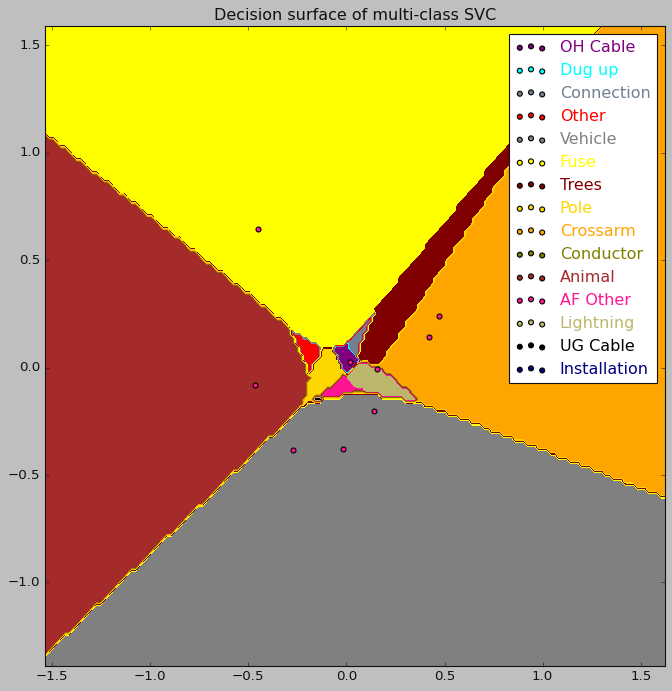

In [16]:
draw_decision_boundary (x_train2, y_train, x_test2, y_test, rf, target)

**SVC**

Train Data represented in decision boundary diagram

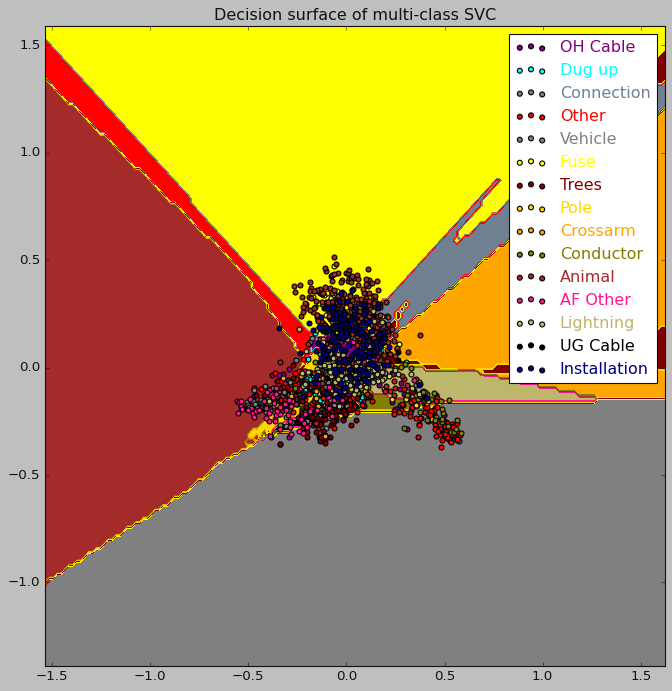

Example of misclassification 
class 'Lightening', indicated by olive green spots. 


Examples of misclassification
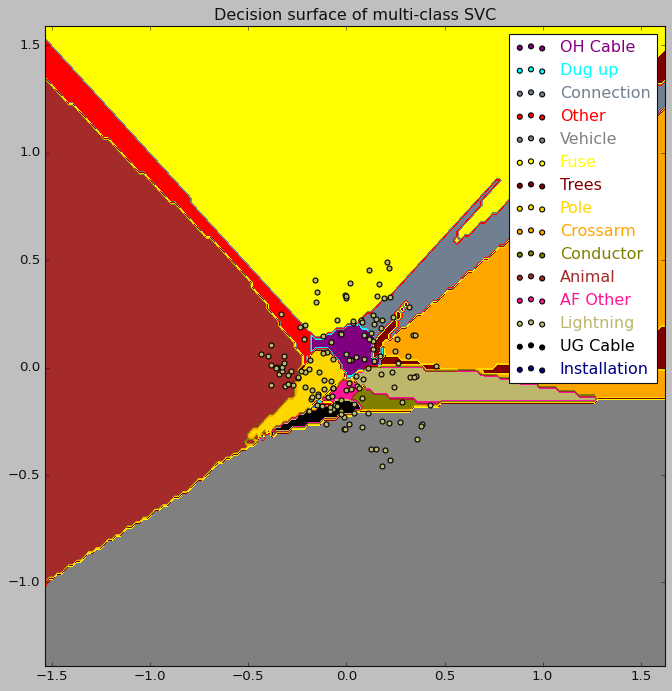

Example 2: Misclassification of OH Cable. 
We can see that most of the classes being misclassified

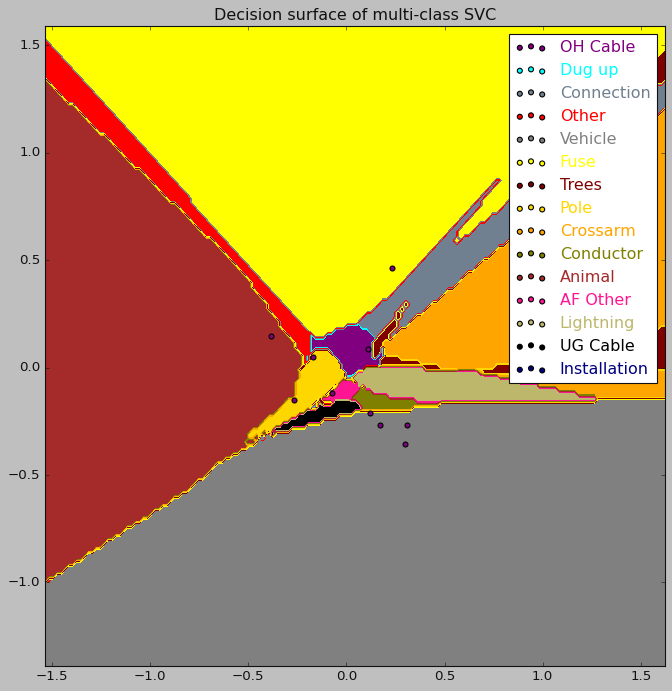

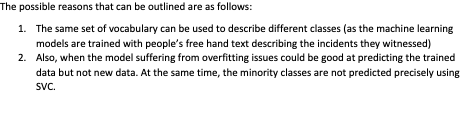

SGD

Training data 

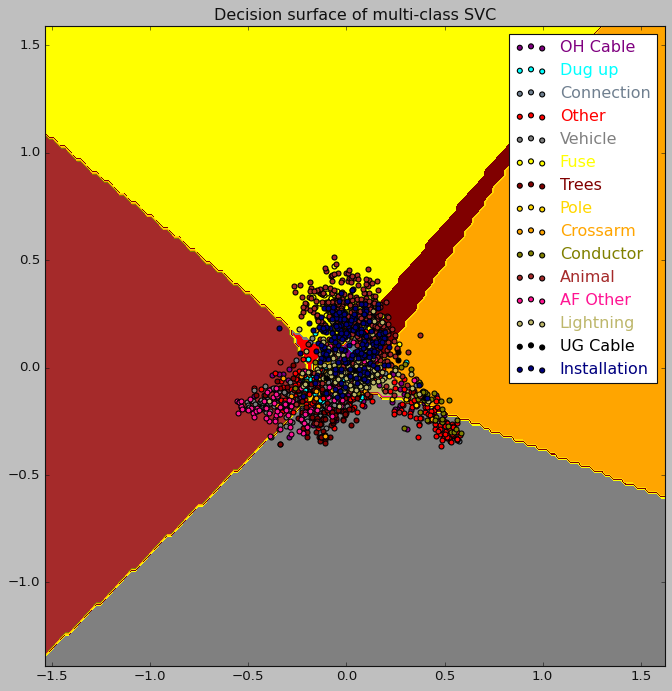

Misclassification of 'AF Other'

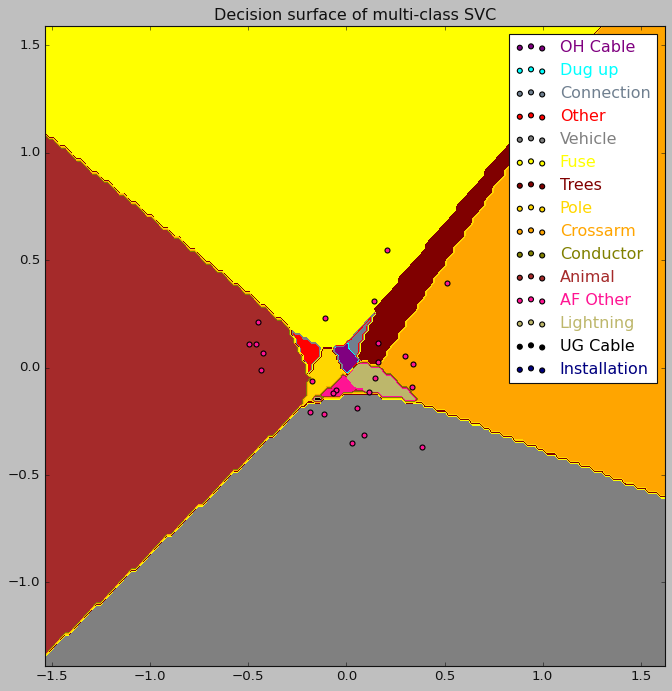